In [1]:
!pip install sparse_lmm


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np

# Remove any hidden or non-printable characters from the file paths
clinical_data = pd.read_csv('C:/Users/张宇强/Desktop/TCGA.PAAD.sampleMap_PAAD_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('C:/Users/张宇强/Desktop/HiSeqV2_PANCAN', sep='\t', index_col=0)


In [4]:
clinical_data.head()

,CDE_ID_3226963,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,adenocarcinoma_invasion,age_at_initial_pathologic_diagnosis,...,_GENOMIC_ID_TCGA_PAAD_RPPA,_GENOMIC_ID_TCGA_PAAD_hMethyl450,_GENOMIC_ID_TCGA_PAAD_mutation,_GENOMIC_ID_TCGA_PAAD_PDMRNAseq,_GENOMIC_ID_TCGA_PAAD_PDMRNAseqCNV,_GENOMIC_ID_TCGA_PAAD_mutation_broad_gene,_GENOMIC_ID_TCGA_PAAD_gistic2thd,_GENOMIC_ID_data/public/TCGA/PAAD/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_PAAD_miRNA_HiSeq,_GENOMIC_ID_TCGA_PAAD_exp_HiSeqV2_percentile
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2J-AAB1-01,MSS,TCGA-2J-AAB1-01,TCGA-2J-AAB1,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,65,...,NaN,TCGA-2J-AAB1-01A-11D-A40Y-05,NaN,TCGA-2J-AAB1-01,TCGA-2J-AAB1-01,TCGA-2J-AAB1-01A-11D-A40W-08,TCGA-2J-AAB1-01A-11D-A40V-01,TCGA-2J-AAB1-01,TCGA-2J-AAB1-01,bf6773cf-f233-4990-885e-56073c92cb0c
TCGA-2J-AAB4-01,MSS,TCGA-2J-AAB4-01,TCGA-2J-AAB4,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NO,NO,YES,48,...,118DE429-5F7E-4622-8F85-151925B6949B,TCGA-2J-AAB4-01A-12D-A40Y-05,NaN,TCGA-2J-AAB4-01,TCGA-2J-AAB4-01,TCGA-2J-AAB4-01A-12D-A40W-08,TCGA-2J-AAB4-01A-12D-A40V-01,TCGA-2J-AAB4-01,TCGA-2J-AAB4-01,435de9a0-3c2b-4b4f-87d1-92f37a0765b5
TCGA-2J-AAB6-01,MSS,TCGA-2J-AAB6-01,TCGA-2J-AAB6,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,75,...,NaN,TCGA-2J-AAB6-01A-11D-A40Y-05,NaN,TCGA-2J-AAB6-01,TCGA-2J-AAB6-01,TCGA-2J-AAB6-01A-11D-A40W-08,TCGA-2J-AAB6-01A-11D-A40V-01,TCGA-2J-AAB6-01,TCGA-2J-AAB6-01,a737c8ad-5796-47f9-8505-4e7fb2a297ed
TCGA-2J-AAB8-01,MSS,TCGA-2J-AAB8-01,TCGA-2J-AAB8,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,71,...,A64C3BC6-4748-4904-88E8-B62DFB3EE6DE,TCGA-2J-AAB8-01A-12D-A40Y-05,NaN,TCGA-2J-AAB8-01,TCGA-2J-AAB8-01,TCGA-2J-AAB8-01A-12D-A40W-08,TCGA-2J-AAB8-01A-12D-A40V-01,TCGA-2J-AAB8-01,TCGA-2J-AAB8-01,b9173a1f-a255-4e0e-88d2-ded795ba0e7b
TCGA-2J-AAB9-01,MSS,TCGA-2J-AAB9-01,TCGA-2J-AAB9,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,70,...,A04E5FF9-552D-462D-B9EE-23B9933324E0,TCGA-2J-AAB9-01A-11D-A40Y-05,NaN,TCGA-2J-AAB9-01,TCGA-2J-AAB9-01,TCGA-2J-AAB9-01A-11D-A40W-08,TCGA-2J-AAB9-01A-11D-A40V-01,TCGA-2J-AAB9-01,TCGA-2J-AAB9-01,23da230e-1c63-4e5b-bf92-8a1bec33073c


In [5]:
gene_data.head()

,TCGA-2L-AAQL-01,TCGA-2J-AABI-01,TCGA-3A-A9J0-01,TCGA-3A-A9I7-01,TCGA-2J-AABO-01,TCGA-IB-7890-01,TCGA-3A-A9IN-01,TCGA-HZ-7926-01,TCGA-3A-A9IH-01,TCGA-2J-AABH-01,...,TCGA-IB-8127-01,TCGA-S4-A8RM-01,TCGA-F2-A7TX-01,TCGA-2L-AAQI-01,TCGA-2J-AABP-01,TCGA-RB-A7B8-01,TCGA-2L-AAQA-01,TCGA-FB-AAQ6-01,TCGA-IB-7644-01,TCGA-HV-A5A5-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,0.379008,-0.290592,0.523208,0.279108,-0.061792,-0.419192,1.157208,0.066408,0.628808,0.422908,...,0.264208,-0.148192,0.624208,0.557108,-0.010292,0.147308,-0.176392,0.470408,0.386908,1.132608
HIF3A,1.143574,0.888074,-0.051326,-0.905626,1.658974,0.180474,2.690974,-0.452926,-0.021726,1.988574,...,1.553974,3.349674,-0.668026,1.703374,-1.485926,1.379174,1.034974,1.781274,-0.795926,1.035074
RNF17,-0.531035,-0.531035,-0.531035,0.650365,-0.531035,-0.531035,3.417065,0.799765,-0.531035,2.682365,...,-0.531035,-0.531035,-0.531035,0.040265,-0.531035,0.950365,-0.531035,-0.531035,-0.531035,-0.531035
RNF10,0.147228,-0.691372,-0.129972,0.157928,0.310928,-0.479772,0.269928,-0.164272,-0.305572,-0.260872,...,-0.243172,-0.137372,0.412528,-0.349872,0.072528,-0.023372,-0.242972,0.351328,-0.172972,0.033928
RNF11,-0.690578,-1.758278,-0.533078,-0.332878,-0.412278,0.439922,-0.184478,0.124022,-0.115578,-1.161878,...,0.021122,-0.852678,-0.352878,-0.397278,-0.240478,-0.274678,-0.831078,-0.992578,0.070022,-0.297678


In [6]:
gene_fullname = 'BRCA gene'
gene = 'brca'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Pancreatic Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')
gene_data.T

The clinical dataset has 114 features, and the gene dataset includes 20530 genes


sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-2L-AAQL-01,0.379008,1.143574,-0.531035,0.147228,-0.690578,-0.37861,0.511306,1.716854,-0.423399,-0.395172,...,-0.029178,0.255783,1.548567,1.34501,-0.521477,1.144914,0.809373,0.780005,3.022267,0.870188
TCGA-2J-AABI-01,-0.290592,0.888074,-0.531035,-0.691372,-1.758278,-0.63221,-0.441294,-0.273846,-0.423399,-0.917972,...,0.038322,-1.140517,0.306067,2.10181,1.628823,0.883814,-0.477027,0.372305,-0.084133,-0.088712
TCGA-3A-A9J0-01,0.523208,-0.051326,-0.531035,-0.129972,-0.533078,-0.30941,-0.161694,0.398054,-0.423399,-0.122072,...,-0.748878,-0.547117,-0.543033,2.49211,-0.515677,1.209614,0.571073,0.956805,1.076167,1.337088
TCGA-3A-A9I7-01,0.279108,-0.905626,0.650365,0.157928,-0.332878,-0.38271,0.060406,0.730754,0.085201,-0.610372,...,-0.240278,-1.078517,0.843067,2.02251,-0.324677,1.470614,0.899073,0.773305,2.004667,0.546088
TCGA-2J-AABO-01,-0.061792,1.658974,-0.531035,0.310928,-0.412278,0.12319,0.016106,1.281854,-0.423399,-0.806772,...,-0.748878,-1.587117,0.025867,0.48571,-0.359077,1.346614,0.740273,0.342305,2.710367,1.167888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-RB-A7B8-01,0.147308,1.379174,0.950365,-0.023372,-0.274678,-0.19011,0.036506,1.558954,-0.423399,-0.537272,...,0.732522,-1.587117,0.904667,-1.28139,-0.131977,1.862614,1.378273,0.921505,1.611767,0.599688
TCGA-2L-AAQA-01,-0.176392,1.034974,-0.531035,-0.242972,-0.831078,-0.09041,-0.470694,-0.646646,-0.423399,-1.146072,...,0.102522,-1.099417,-1.008133,-1.28139,-0.486877,0.614414,-0.454627,0.184905,-1.153533,0.250388
TCGA-FB-AAQ6-01,0.470408,1.781274,-0.531035,0.351328,-0.992578,-0.27731,-0.184194,0.404854,0.531901,-0.307872,...,-0.748878,-1.587117,-0.238833,-1.28139,-0.838177,0.101414,-0.063127,0.651605,0.267867,0.306488
TCGA-IB-7644-01,0.386908,-0.795926,-0.531035,-0.172972,0.070022,-0.15961,0.449606,0.412054,-0.423399,-0.468972,...,-0.362978,-0.645817,-0.196333,-0.59119,-0.164677,0.698914,-0.097327,0.682305,1.262467,-0.272012


In [7]:
merged_data = clinical_data.join(gene_data.T)

merged_data.head()

,CDE_ID_3226963,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,adenocarcinoma_invasion,age_at_initial_pathologic_diagnosis,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2J-AAB1-01,MSS,TCGA-2J-AAB1-01,TCGA-2J-AAB1,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,65,...,-0.748878,-0.604817,0.599267,-1.28139,-0.223977,0.502114,0.385573,0.775305,2.372667,0.829488
TCGA-2J-AAB4-01,MSS,TCGA-2J-AAB4-01,TCGA-2J-AAB4,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NO,NO,YES,48,...,0.675222,0.672283,0.434167,-1.28139,-0.609577,0.227514,0.170673,0.535405,1.988767,0.575888
TCGA-2J-AAB6-01,MSS,TCGA-2J-AAB6-01,TCGA-2J-AAB6,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,75,...,-0.748878,-1.587117,0.744867,-1.28139,-0.659977,1.078214,0.160973,0.588205,-0.817033,0.258988
TCGA-2J-AAB8-01,MSS,TCGA-2J-AAB8-01,TCGA-2J-AAB8,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,71,...,-0.748878,-0.061017,0.140167,0.65221,0.114023,1.804914,0.864373,0.322105,1.441267,0.541188
TCGA-2J-AAB9-01,MSS,TCGA-2J-AAB9-01,TCGA-2J-AAB9,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,70,...,-0.748878,1.963583,0.751967,0.37101,-0.000777,1.367514,1.271773,-0.053795,3.029567,0.286788


In [8]:
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]


threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2J-AAB1-01,-23962,-0.072992,3.176274,0.042165,0.133528,-0.736678,-0.19891,0.071506,0.747254,-0.423399,...,-0.748878,-0.604817,0.599267,-1.28139,-0.223977,0.502114,0.385573,0.775305,2.372667,0.829488
TCGA-2J-AAB4-01,-17794,0.654608,0.380374,-0.531035,-0.046472,-0.185578,-0.50201,0.326006,0.428454,0.083401,...,0.675222,0.672283,0.434167,-1.28139,-0.609577,0.227514,0.170673,0.535405,1.988767,0.575888
TCGA-2J-AAB6-01,-27600,0.377208,1.086674,-0.531035,0.463928,0.479622,-0.47171,-0.190094,0.413254,-0.423399,...,-0.748878,-1.587117,0.744867,-1.28139,-0.659977,1.078214,0.160973,0.588205,-0.817033,0.258988
TCGA-2J-AAB8-01,-26028,-0.168392,-0.833226,-0.531035,-0.233272,-0.373978,-0.32791,-0.438694,1.142054,0.532701,...,-0.748878,-0.061017,0.140167,0.65221,0.114023,1.804914,0.864373,0.322105,1.441267,0.541188
TCGA-2J-AAB9-01,-25920,0.563508,0.298374,0.519865,0.089028,-0.273578,-0.32561,0.539906,0.588754,-0.423399,...,-0.748878,1.963583,0.751967,0.37101,-0.000777,1.367514,1.271773,-0.053795,3.029567,0.286788


In [10]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()


,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Pancreatic Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2J-AAB1-01,-23962,-0.072992,3.176274,0.042165,0.133528,-0.736678,-0.19891,0.071506,0.747254,-0.423399,...,-0.604817,0.599267,-1.28139,-0.223977,0.502114,0.385573,0.775305,2.372667,0.829488,1
TCGA-2J-AAB4-01,-17794,0.654608,0.380374,-0.531035,-0.046472,-0.185578,-0.50201,0.326006,0.428454,0.083401,...,0.672283,0.434167,-1.28139,-0.609577,0.227514,0.170673,0.535405,1.988767,0.575888,1
TCGA-2J-AAB6-01,-27600,0.377208,1.086674,-0.531035,0.463928,0.479622,-0.47171,-0.190094,0.413254,-0.423399,...,-1.587117,0.744867,-1.28139,-0.659977,1.078214,0.160973,0.588205,-0.817033,0.258988,1
TCGA-2J-AAB8-01,-26028,-0.168392,-0.833226,-0.531035,-0.233272,-0.373978,-0.32791,-0.438694,1.142054,0.532701,...,-0.061017,0.140167,0.65221,0.114023,1.804914,0.864373,0.322105,1.441267,0.541188,1
TCGA-2J-AAB9-01,-25920,0.563508,0.298374,0.519865,0.089028,-0.273578,-0.32561,0.539906,0.588754,-0.423399,...,1.963583,0.751967,0.37101,-0.000777,1.367514,1.271773,-0.053795,3.029567,0.286788,1


In [11]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

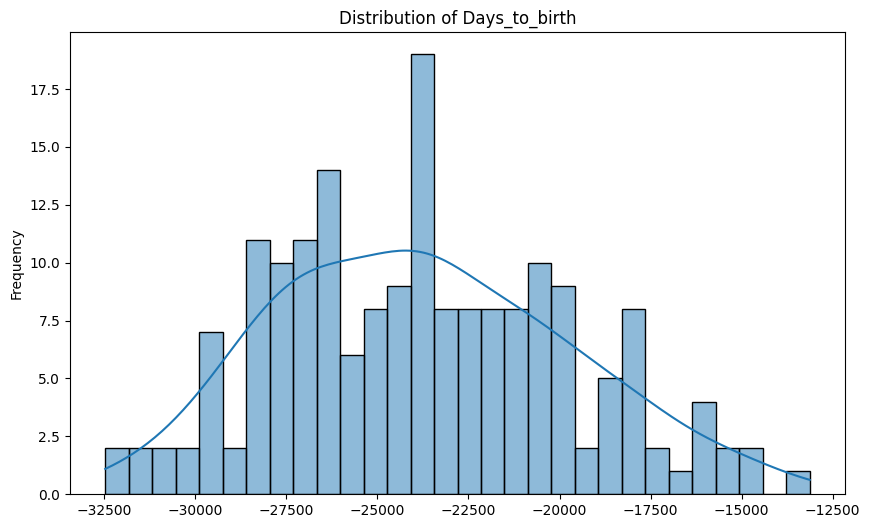

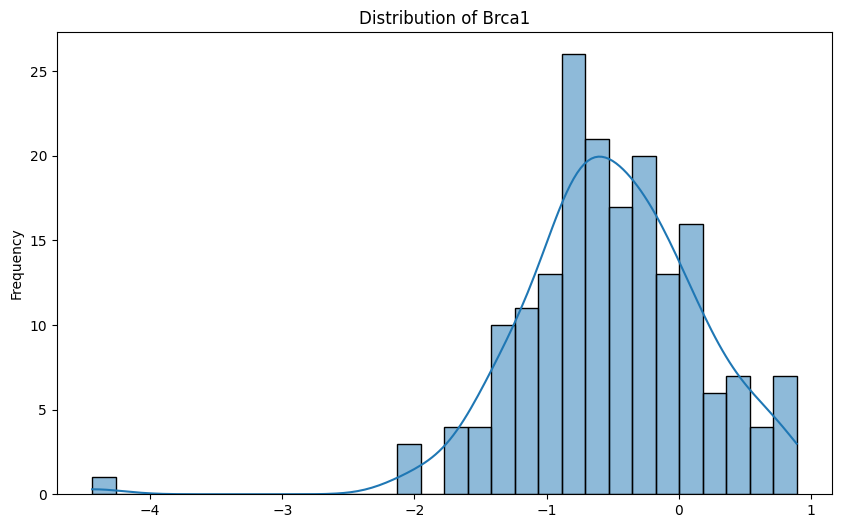

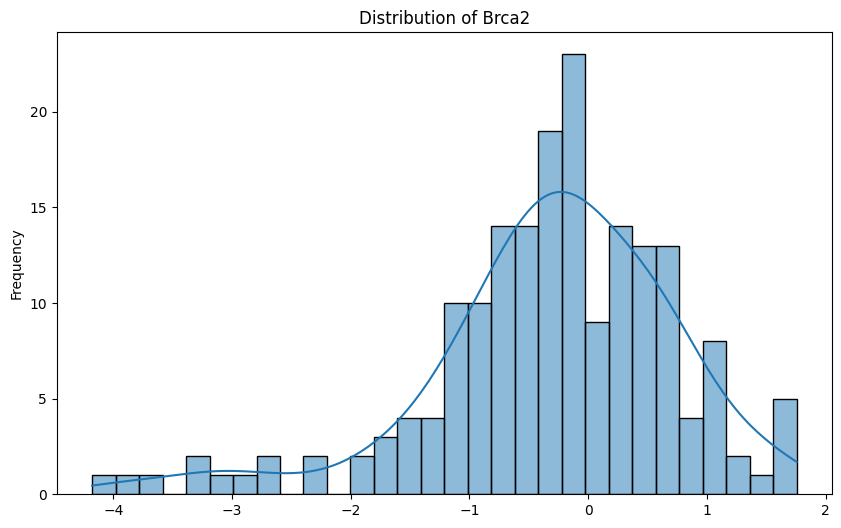

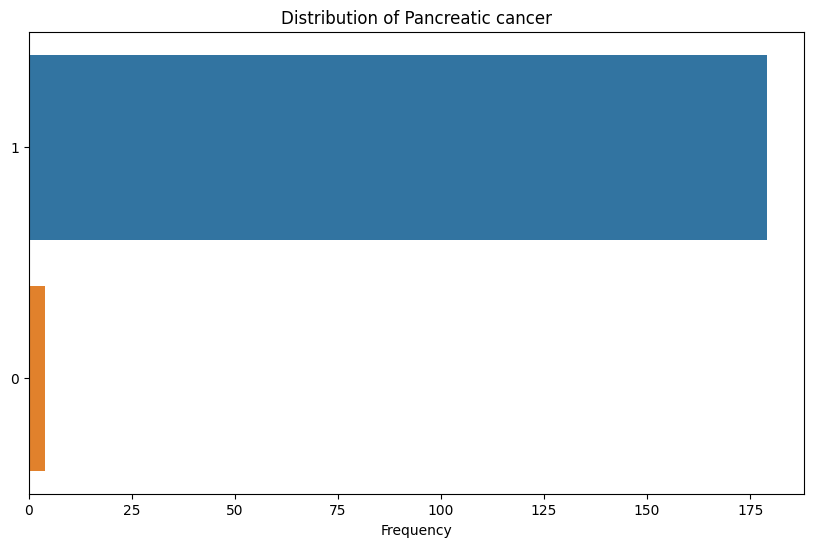

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

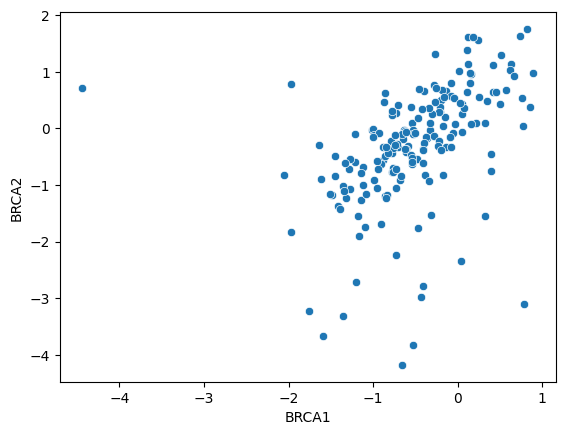

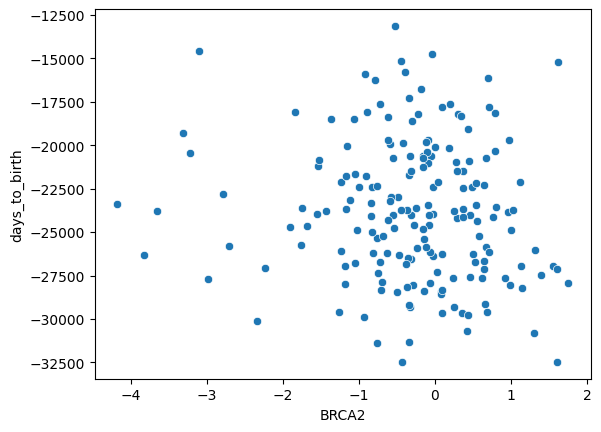

In [13]:
sns.scatterplot(data=merged_data, x='BRCA1', y='BRCA2')
plt.show()
sns.scatterplot(data=merged_data, x='BRCA2', y=condition_col)
plt.show()

In [14]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Pancreatic Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2J-AAB1-01,65,-0.072992,3.176274,0.042165,0.133528,-0.736678,-0.19891,0.071506,0.747254,-0.423399,...,-0.604817,0.599267,-1.28139,-0.223977,0.502114,0.385573,0.775305,2.372667,0.829488,1
TCGA-2J-AAB4-01,48,0.654608,0.380374,-0.531035,-0.046472,-0.185578,-0.50201,0.326006,0.428454,0.083401,...,0.672283,0.434167,-1.28139,-0.609577,0.227514,0.170673,0.535405,1.988767,0.575888,1
TCGA-2J-AAB6-01,75,0.377208,1.086674,-0.531035,0.463928,0.479622,-0.47171,-0.190094,0.413254,-0.423399,...,-1.587117,0.744867,-1.28139,-0.659977,1.078214,0.160973,0.588205,-0.817033,0.258988,1
TCGA-2J-AAB8-01,71,-0.168392,-0.833226,-0.531035,-0.233272,-0.373978,-0.32791,-0.438694,1.142054,0.532701,...,-0.061017,0.140167,0.65221,0.114023,1.804914,0.864373,0.322105,1.441267,0.541188,1
TCGA-2J-AAB9-01,70,0.563508,0.298374,0.519865,0.089028,-0.273578,-0.32561,0.539906,0.588754,-0.423399,...,1.963583,0.751967,0.37101,-0.000777,1.367514,1.271773,-0.053795,3.029567,0.286788,1


In [15]:
import pandas as pd
from sparse_lmm import VariableSelection

# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    # Shuffle data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        binary_predictions = (predictions > 0.5).astype(int)

        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

d:\temp\temp\ipykernel_21612\2284219672.py:12: RuntimeWarning: invalid value encountered in true_divide
  X = (X - mean) / std
D:\Anaconda3\lib\site-packages\sparse_lmm\helpingMethods.py:49: RuntimeWarning: invalid value encountered in true_divide
  ts = beta / np.sqrt(var * sigma)
D:\Anaconda3\lib\site-packages\sparse_lmm\VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.730246913580247


In [16]:

var_select = VariableSelection()

# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()

In [17]:
gene_result = []
condition_result = []

# Extract information related to the regressors
for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values):
    if gene in var.lower():
        gene_result.append((var, coef, np.exp(-nlogp)))
    if condition == var.lower():
        condition_result.append((var, coef, np.exp(-nlogp)))

regression_report = "Regression Results:\n\n"
regression_report += f"For {gene}:\n"
for variable_name, coefficient, p_value in gene_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

regression_report += f"\nFor {condition}:\n"
for variable_name, coefficient, p_value in condition_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

print(regression_report)

Regression Results:

For brca:
BRCA1: Coefficient = 0.01645363182891113, p-value = 0.30873392524554316
BRCA2: Coefficient = 0.008530673478008075, p-value = 0.7338260164389122

For age:
age: Coefficient = 0.01080112984938154, p-value = 0.3812809105610707



In [18]:

hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between BRCA gene and Pancreatic Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the BRCA gene and Pancreatic Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the BRCA gene and Pancreatic Cancer when considering the influence of age.




In [21]:
threshold = 0.2
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    interpretation = f"Variable: {variable_name}\n"

    if coefficient > 0:
        interpretation += "Coefficient is positive, "
    elif coefficient < 0:
        interpretation += "Coefficient is negative, "
    else:
        interpretation += "Coefficient is zero, "

    if p_value < threshold:
        interpretation += f"and it is statistically significant (p-value < {threshold}).\n\n"
    else:
        interpretation += f"and it is not statistically significant (p-value >= {threshold}).\n\n"

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n"

for variable_name, coefficient, p_value in gene_result + condition_result:
    interpretation_coefficient_report += interpret_coefficient(variable_name, coefficient, p_value, threshold)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: BRCA1
Coefficient is positive, and it is not statistically significant (p-value >= 0.2).

Variable: BRCA2
Coefficient is positive, and it is not statistically significant (p-value >= 0.2).

Variable: age
Coefficient is positive, and it is not statistically significant (p-value >= 0.2).




In [22]:
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    if p_value >= significance_level:
        return f"H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the {variable_name} gene and {trait} when considering the influence of {condition}."
    elif coefficient != 0 and p_value < significance_level:
        return f"H1 is confirmed: There is an association between the expression of the {variable_name} and {trait} when considering the influence of {condition}.\n\n"

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n"

for variable_name, coefficient, p_value in gene_result:
    confirmation = confirm_hypothesis(coefficient, p_value, variable_name, threshold)
    hypothesis_confirmation_report += f"Variable: {variable_name}\n"
    hypothesis_confirmation_report += f"Conclusion: {confirmation}\n\n"

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: BRCA1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the BRCA1 gene and Pancreatic Cancer when considering the influence of age.

Variable: BRCA2
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the BRCA2 gene and Pancreatic Cancer when considering the influence of age.


